In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## EDA IMDB Ratings

#### Goals

- Get descriptive statistics for imdb tv shows ratings for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Hulu
#### i. Import data

In [2]:
hulu = pd.read_pickle("Data_Hulu_Disney/hulu_final_clean.pkl")

In [3]:
hulu.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Rick and Morty,2013,18.0,9.2,tt2861424,tvSeries,Rick and Morty,Rick and Morty,2013.0,2013.0,23.0,"Adventure,Animation,Comedy"
1,Fargo,2014,18.0,8.9,tt2802850,tvSeries,Fargo,Fargo,2014.0,2014.0,53.0,"Crime,Drama,Thriller"
2,Vikings,2013,18.0,8.5,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
3,Brooklyn Nine-Nine,2013,16.0,8.4,tt2467372,tvSeries,Brooklyn Nine-Nine,Brooklyn Nine-Nine,2013.0,2013.0,22.0,"Comedy,Crime"
4,Community,2009,7.0,8.5,tt1439629,tvSeries,Community,Community,2009.0,2009.0,22.0,Comedy


In [4]:
hulu["imdb_rating"].isna().sum()

123

Since the information for imdb_rating column was obtained from web scraping, we will now join the ratings table from IMDB Database in order to get all the correct values for imdb_ratings.

In [5]:
ratings = pd.read_csv("C:/Users/Admin/Documents/ironhack/title.ratings.tsv.gz", sep="\t")

In [6]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,197
2,tt0000003,6.5,1294
3,tt0000004,6.1,121
4,tt0000005,6.1,2066


In [7]:
ratings = ratings.drop(columns="numVotes")

We will join both tables by imdb_id and tconst.

In [8]:
hulu = hulu.merge(ratings, how="left", left_on="imdb_id", right_on="tconst")

In [9]:
hulu.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,tconst,averageRating
0,Rick and Morty,2013,18.0,9.2,tt2861424,tvSeries,Rick and Morty,Rick and Morty,2013.0,2013.0,23.0,"Adventure,Animation,Comedy",tt2861424,9.2
1,Fargo,2014,18.0,8.9,tt2802850,tvSeries,Fargo,Fargo,2014.0,2014.0,53.0,"Crime,Drama,Thriller",tt2802850,8.9
2,Vikings,2013,18.0,8.5,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama",tt2306299,8.5
3,Brooklyn Nine-Nine,2013,16.0,8.4,tt2467372,tvSeries,Brooklyn Nine-Nine,Brooklyn Nine-Nine,2013.0,2013.0,22.0,"Comedy,Crime",tt2467372,8.4
4,Community,2009,7.0,8.5,tt1439629,tvSeries,Community,Community,2009.0,2009.0,22.0,Comedy,tt1439629,8.5


In [10]:
hulu["averageRating"].isna().sum()

99

In [11]:
1 - (hulu["averageRating"].isna().sum() / len(hulu))

0.932469304229195

Now we have less null values for imdb ratings, now we will reate a data frame which will have only the show names and ratings.


In [12]:
hulu_ratings = hulu[["show", "averageRating"]]

In [13]:
hulu_ratings = hulu_ratings[~hulu_ratings["averageRating"].isna()]

#### ii. Descriptive Statistics

In [14]:
hulu_ratings["averageRating"].describe()

count    1367.000000
mean        7.047769
std         1.209416
min         1.800000
25%         6.500000
50%         7.300000
75%         7.900000
max         9.500000
Name: averageRating, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by hulu have 7.04 as an average rating.
- 25% of the tv shows have 6.5 or lower as average rating.
- 50% of the tv shows have 7.3 or higher average rating.
- 25% of the tv shows have 7.9 or higher as average rating.

#### iii. Plotting

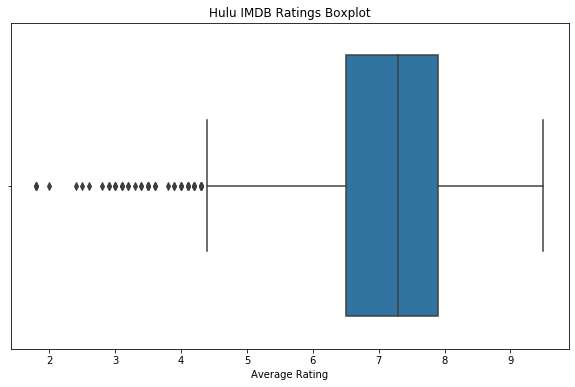

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hulu_ratings["averageRating"])
ax.set_title("Hulu IMDB Ratings Boxplot")
ax.set_xlabel("Average Rating");

From the box plot we can clearly see how most of the tv shows have between 6.5 and 8 as an average rating. There are some outliers that have less than around 4.5 average rating up unitl 1.8, the minimum value.

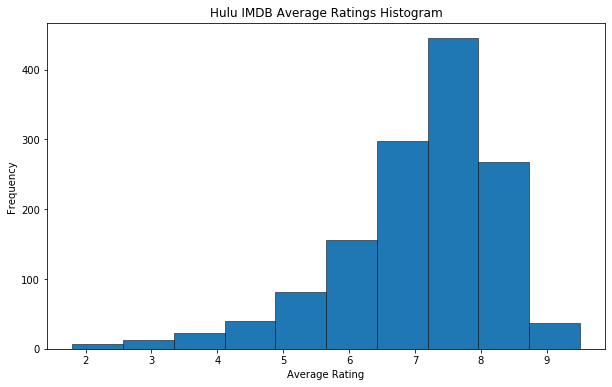

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hulu_ratings["averageRating"], ec="black", lw=0.5)
ax.set_title("Hulu IMDB Average Ratings Histogram")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Frequency");

The histogram above is left skewed, most of the tv shows provided by Hulu, as stated previously, have average ratings between 7 and 8, and very few have a rating lower than 5.

-----

### 2. Disney+
#### i. Import data

In [17]:
disney = pd.read_pickle("Data_Hulu_Disney/disney_final_clean.pkl")

In [18]:
disney.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Mandalorian,2019,7.0,8.7,tt8111088,tvSeries,The Mandalorian,The Mandalorian,2019.0,2019.0,30.0,"Action,Adventure,Sci-Fi"
1,The Simpsons,1989,7.0,8.7,tt0096697,tvSeries,The Simpsons,The Simpsons,1989.0,1989.0,22.0,"Animation,Comedy"
2,Gravity Falls,2012,7.0,8.9,tt1865718,tvSeries,Gravity Falls,Gravity Falls,2012.0,2012.0,23.0,"Action,Adventure,Animation"
3,Star Wars: The Clone Wars,2008,7.0,8.2,tt0458290,tvSeries,Star Wars: The Clone Wars,Star Wars: The Clone Wars,2008.0,2008.0,23.0,"Action,Adventure,Animation"
4,DuckTales,2017,7.0,8.2,tt5531466,tvSeries,DuckTales,DuckTales,2017.0,2017.0,21.0,"Action,Adventure,Animation"


In [19]:
disney["imdb_rating"].isna().sum()

3

In [20]:
disney = disney.merge(ratings, how="left", left_on="imdb_id", right_on="tconst")

In [21]:
disney["averageRating"].isna().sum()

1

In [22]:
disney_ratings = disney[["show", "averageRating"]]

In [23]:
disney_ratings = disney_ratings[~disney_ratings["averageRating"].isna()]

#### ii. Descriptive Statistics

In [24]:
disney_ratings["averageRating"].describe()

count    151.000000
mean       6.947682
std        1.108863
min        3.500000
25%        6.200000
50%        6.900000
75%        7.900000
max        9.100000
Name: averageRating, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by disney+ have 6.94 as an average rating.
- 25% of the tv shows have 6.2 or lower as average rating.
- 50% of the tv shows have 6.9 or higher average rating.
- 25% of the tv shows have 7.9 or higher as average rating.

#### iii. Plotting

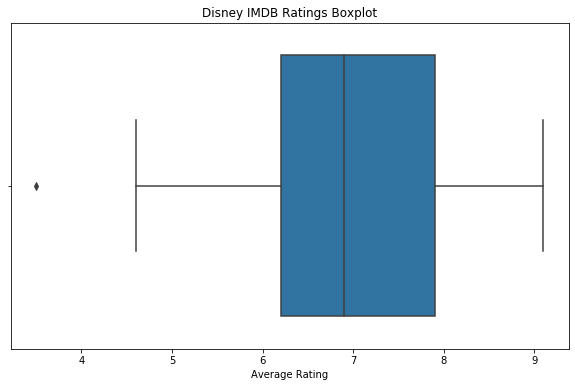

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(disney_ratings["averageRating"])
ax.set_title("Disney IMDB Ratings Boxplot")
ax.set_xlabel("Average Rating");

From the box plot we can clearly see how most of the tv shows have between 6.2 and 8 as an average rating. There are some outliers that have less than around 4.5 average rating up unitl 3.5, the minimum value.

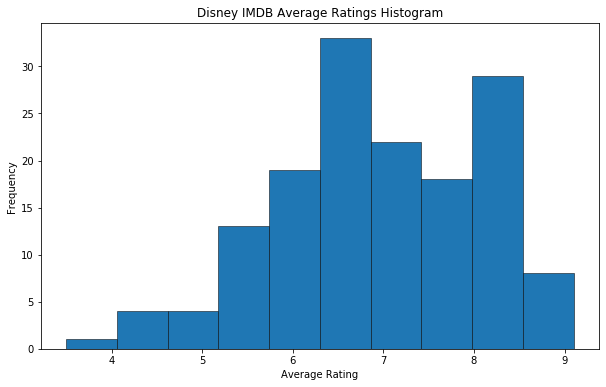

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(disney_ratings["averageRating"], ec="black", lw=0.5)
ax.set_title("Disney IMDB Average Ratings Histogram")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Frequency");

The histogram above shows that most of the TV shows provided by Disney+ have average ratings between 6-7 and 8-8.5. Very few have ratings lower than 5.

-----

### 3. Comparison

- Hulu seems to have very similar ratings as Netflix and Amazon, all having 1.8 as a minimum and 9.5 as a maximum average rating. Half of their TV shows have 7.4 or higher average rating. Most of their ratings range from 7-8.
- Disney+  has unequal distribution of ratings, having most TV shows between 6-7 and 8-8.5 average ratings. Its lowest average rating is of 3.5 and maximum is 9.1.
- HBO has higher average ratings than the other streaming services. It has 4.8 as a minimum and 9.4 as a maximum. Most of its ratings range between 7 and 9.
- It seems that HBO has higher average ratings in general.